In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

In [2]:
real = pd.read_csv("islenmis_dogru_haberler.csv")
fake = pd.read_csv("islenmis_sahte_haberler.csv")

# Etiket ekleme
real['label'] = 1
fake['label'] = 0

# Veri setlerini birleştirme
df = pd.concat([real, fake], ignore_index=True)
X = df["Haber"]
y = df['label']

# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# TF-IDF vektörlerine dönüştürme
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [3]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Test verisi üzerinde tahmin yapma
y_pred_svm = svm_model.predict(X_test_tfidf)

Test Verisi doğruluk değeri (SVM): 98.1


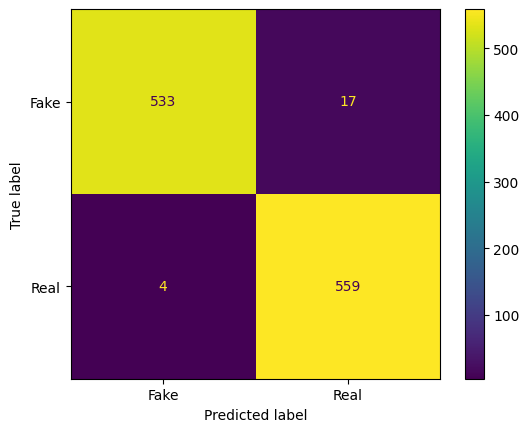

In [4]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('Test Verisi doğruluk değeri (SVM): %.1f'%(accuracy_svm*100))

# Confusion matrix oluşturma ve görselleştirme
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Fake', 'Real'])
disp_svm.plot()
plt.show()